In [2]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import pycaret
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("train.csv")

In [4]:
df.head()

,id,Pendapatan Keluarga,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Status Kepesertaan Program Bantuan Pemerintah,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Status Kepemilikan Tempat Tinggal,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT
0,127748,Rp 1.000.000 s.d. Rp 2.000.000,2.0,Tidak Bekerja,SLTA Sederajat,Milik Sendiri,Kab. Sragen,500000.0,KIS/JKS/BPJS,KIPK,Meninggal,Hidup,Milik Sendiri,2.0,900.0,144.0,126.0,103.0,genting,semen,keramik,450000.0,0.0,0.0,Ilmu Politik,Kab. Sragen,SNBT,0.0
1,90205,lebih dari Rp 5.000.000,2.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Tangerang,3500000.0,KIS/JKS/BPJS,Tidak Ada,Hidup,Hidup,Milik Sendiri,6500000.0,900.0,60.0,22.0,128.0,Genteng,Batako Plester,Keramik,320000.0,45000000.0,4500000.0,Geografi,Kabupaten Tangerang,SNBP,3.0
2,82795,Rp 3.000.000 s.d. Rp 4.000.000,2.0,Wiraswasta,SD,Milik Sendiri,Kabupaten Grobogan,600000.0,KIS/JKS/BPJS,Tidak,Hidup,Hidup,Milik Sendiri,20000000.0,450.0,586.0,65.0,128000.0,Genting,Batu Bata,Keramik,NaN,0.0,0.0,Ilmu Politik,Kabupaten Grobogan,SNBT,4.0
3,108947,lebih dari Rp 5.000.000,2.0,Wiraswasta,SLTP,Milik Sendiri,Kab. Bogor,2250000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,8000000.0,900.0,93.0,70.0,2176000.0,Kayu dan asbes,Bata merah dan hebel,Keramik,500000.0,0.0,0.0,Pendidikan Ekonomi,Kab. Bogor,SNBT,5.0
4,89985,Rp 3.000.000 s.d. Rp 4.000.000,NaN,Wiraswasta,MTs,Milik Sendiri,Kabupaten Pemalang,2310000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,1000000.0,900.0,0.0,57.0,0.0,"Genting tanah liat, asbes, dan seng.",Batu bata,"Keramik, tegel, plester.",105000.0,5000000.0,500000.0,Pendidikan Teknik Elektro,Kabupaten Pemalang,SNBP,3.0


In [5]:
df.isnull().sum()

id                                                           0
Pendapatan Keluarga                                        212
Jumlah Tanggungan dalam Keluarga                           220
Pekerjaan Orang Tua/Wali                                   194
Pendidikan Orang Tua/Wali                                  200
Kepemilikan Aset                                           207
Lokasi Tempat Tinggal                                      143
Pengeluaran Bulanan Keluarga                               221
Status Kepesertaan Program Bantuan Pemerintah             4988
Riwayat Beasiswa atau Bantuan Pendidikan                     0
Ayah Hidup?                                                212
Ibu Hidup?                                                 192
Status Kepemilikan Tempat Tinggal                          214
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     276
Daya Listrik (Watt)                                        214
Luas Tanah Rumah (m2)                                  

In [6]:
persentase_hilang = df.isnull().sum() / df.shape[0] * 100
print(persentase_hilang)

id                                                         0.000000
Pendapatan Keluarga                                        0.697828
Jumlah Tanggungan dalam Keluarga                           0.724161
Pekerjaan Orang Tua/Wali                                   0.638578
Pendidikan Orang Tua/Wali                                  0.658328
Kepemilikan Aset                                           0.681369
Lokasi Tempat Tinggal                                      0.470704
Pengeluaran Bulanan Keluarga                               0.727452
Status Kepesertaan Program Bantuan Pemerintah             16.418697
Riwayat Beasiswa atau Bantuan Pendidikan                   0.000000
Ayah Hidup?                                                0.697828
Ibu Hidup?                                                 0.631995
Status Kepemilikan Tempat Tinggal                          0.704411
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     0.908492
Daya Listrik (Watt)                             

In [7]:
kat_numerik = df.select_dtypes(include=['number'])
kat_objek = df.select_dtypes(include=['object'])

kat_numerik.columns

Index(['id', 'Jumlah Tanggungan dalam Keluarga',
       'Pengeluaran Bulanan Keluarga',
       'Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki',
       'Daya Listrik (Watt)', 'Luas Tanah Rumah (m2)',
       'Luas Bangunan Rumah (m2)', 'NJOP per Meter',
       'Rerata Pengeluaran Listrik & Air per Bulan', 'Total Hutang',
       'Cicilan Hutang per Bulan', 'Golongan UKT'],
      dtype='object')

In [8]:
kat_objek.columns

Index(['Pendapatan Keluarga', 'Pekerjaan Orang Tua/Wali',
       'Pendidikan Orang Tua/Wali', 'Kepemilikan Aset',
       'Lokasi Tempat Tinggal',
       'Status Kepesertaan Program Bantuan Pemerintah',
       'Riwayat Beasiswa atau Bantuan Pendidikan', 'Ayah Hidup?', 'Ibu Hidup?',
       'Status Kepemilikan Tempat Tinggal', 'Bahan Atap Rumah',
       'Bahan Tembok Rumah', 'Bahan Lantai Rumah', 'Program Studi', 'Kota',
       'Jalur Masuk'],
      dtype='object')

In [9]:
df['Jumlah Tanggungan dalam Keluarga'] = df['Jumlah Tanggungan dalam Keluarga'].fillna(df['Jumlah Tanggungan dalam Keluarga'].mean())
df['Pengeluaran Bulanan Keluarga'] = df['Pengeluaran Bulanan Keluarga'].fillna(df['Pengeluaran Bulanan Keluarga'].mean())
df['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'] = df['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'].fillna(df['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'].mean())
df['Daya Listrik (Watt)'] = df['Daya Listrik (Watt)'].fillna(df['Daya Listrik (Watt)'].mean())
df['Luas Tanah Rumah (m2)'] = df['Luas Tanah Rumah (m2)'].fillna(df['Luas Tanah Rumah (m2)'].mean())
df['Luas Bangunan Rumah (m2)'] = df['Luas Bangunan Rumah (m2)'].fillna(df['Luas Bangunan Rumah (m2)'].mean())
df['NJOP per Meter'] = df['NJOP per Meter'].fillna(df['NJOP per Meter'].mean())
df['Rerata Pengeluaran Listrik & Air per Bulan'] = df['Rerata Pengeluaran Listrik & Air per Bulan'].fillna(df['Rerata Pengeluaran Listrik & Air per Bulan'].mean())
df['Total Hutang'] = df['Total Hutang'].fillna(df['Total Hutang'].mean())
df['Cicilan Hutang per Bulan'] = df['Cicilan Hutang per Bulan'].fillna(df['Cicilan Hutang per Bulan'].mean())
df['Golongan UKT'] = df['Golongan UKT'].fillna(df['Golongan UKT'].mean())

In [10]:
persentase_hilang = df.isnull().sum() / df.shape[0] * 100
print(persentase_hilang)

id                                                         0.000000
Pendapatan Keluarga                                        0.697828
Jumlah Tanggungan dalam Keluarga                           0.000000
Pekerjaan Orang Tua/Wali                                   0.638578
Pendidikan Orang Tua/Wali                                  0.658328
Kepemilikan Aset                                           0.681369
Lokasi Tempat Tinggal                                      0.470704
Pengeluaran Bulanan Keluarga                               0.000000
Status Kepesertaan Program Bantuan Pemerintah             16.418697
Riwayat Beasiswa atau Bantuan Pendidikan                   0.000000
Ayah Hidup?                                                0.697828
Ibu Hidup?                                                 0.631995
Status Kepemilikan Tempat Tinggal                          0.704411
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     0.000000
Daya Listrik (Watt)                             

In [11]:
kat_objek.columns

Index(['Pendapatan Keluarga', 'Pekerjaan Orang Tua/Wali',
       'Pendidikan Orang Tua/Wali', 'Kepemilikan Aset',
       'Lokasi Tempat Tinggal',
       'Status Kepesertaan Program Bantuan Pemerintah',
       'Riwayat Beasiswa atau Bantuan Pendidikan', 'Ayah Hidup?', 'Ibu Hidup?',
       'Status Kepemilikan Tempat Tinggal', 'Bahan Atap Rumah',
       'Bahan Tembok Rumah', 'Bahan Lantai Rumah', 'Program Studi', 'Kota',
       'Jalur Masuk'],
      dtype='object')

In [19]:
df['Lokasi Tempat Tinggal'].unique()

array(['Kab. Sragen', 'Kabupaten Tangerang ', 'Kabupaten Grobogan ',
       'Kab. Bogor', 'Kabupaten Pemalang ', 'Kabupaten Lahat ',
       'Kota Semarang ', 'Kabupaten Kerawang ', 'Kabupaten Temanggung ',
       'Kab. Boyolali', 'Kabupaten Boyolali ', 'Kota Jakarta Selatan ',
       'Kab. Jepara', 'Kota Bekasi ', 'Kota Pekanbaru', 'Kota Tegal',
       'Kab. Pemalang', 'Kabupaten Pekalongan ', 'Kota Semarang',
       'Kabupaten Banyuasin ', 'Kab. Rembang', 'Kab. Semarang',
       'Kab. Pati', 'Kota Tangerang ', 'Kota Bekasi',
       'Kabupaten Purworejo ', 'Kabupaten Demak ', 'Kab. Kudus',
       'Kabupaten Blora ', 'Kab. Klaten', 'Kabupaten Musi Banyuasin ',
       'Kabupaten Jepara ', 'Kabupaten Cirebon ', 'Kabupaten Kebumen ',
       'Kabupaten Brebes ', 'Kota Bandar Lampung ', 'Kab. Grobogan',
       'Kabupaten Banyumas ', 'Kab. Cirebon', 'Kab. Bekasi',
       'Kabupaten Banjarnegara ', 'Kabupaten Wonosobo ', 'Kab. Kebumen',
       'Kab. Lampung Utara', 'Kab. Blora', 'Kab. Pekalong

In [12]:
df['Pendapatan Keluarga'] = df['Pendapatan Keluarga'].fillna(df['Pendapatan Keluarga'].mode()[0])
df['Pekerjaan Orang Tua/Wali'] = df['Pekerjaan Orang Tua/Wali'].fillna(df['Pekerjaan Orang Tua/Wali'].mode()[0])
df['Pendidikan Orang Tua/Wali'] = df['Pendidikan Orang Tua/Wali'].fillna(df['Pendidikan Orang Tua/Wali'].mode()[0])
df['Kepemilikan Aset'] = df['Kepemilikan Aset'].fillna(df['Kepemilikan Aset'].mode()[0])
df['Lokasi Tempat Tinggal'] = df['Lokasi Tempat Tinggal'].fillna(df['Lokasi Tempat Tinggal'].mode()[0])
df['Riwayat Beasiswa atau Bantuan Pendidikan'] = df['Riwayat Beasiswa atau Bantuan Pendidikan'].fillna(df['Riwayat Beasiswa atau Bantuan Pendidikan'].mode()[0])
df['Ayah Hidup?'] = df['Ayah Hidup?'].fillna(df['Ayah Hidup?'].mode()[0])
df['Ibu Hidup?'] = df['Ibu Hidup?'].fillna(df['Ibu Hidup?'].mode()[0])
df['Status Kepemilikan Tempat Tinggal'] = df['Status Kepemilikan Tempat Tinggal'].fillna(df['Status Kepemilikan Tempat Tinggal'].mode()[0])
df['Bahan Atap Rumah'] = df['Bahan Atap Rumah'].fillna(df['Bahan Atap Rumah'].mode()[0])
df['Bahan Tembok Rumah'] = df['Bahan Tembok Rumah'].fillna(df['Bahan Tembok Rumah'].mode()[0])
df['Bahan Lantai Rumah'] = df['Bahan Lantai Rumah'].fillna(df['Bahan Lantai Rumah'].mode()[0])
df['Bahan Atap Rumah'] = df['Bahan Atap Rumah'].fillna(df['Bahan Atap Rumah'].mode()[0])
df['Program Studi'] = df['Program Studi'].fillna(df['Program Studi'].mode()[0])
df['Kota'] = df['Kota'].fillna(df['Kota'].mode()[0])
df['Jalur Masuk'] = df['Jalur Masuk'].fillna(df['Jalur Masuk'].mode()[0])

In [13]:
persentase_hilang = df.isnull().sum() / df.shape[0] * 100
print(persentase_hilang)

id                                                         0.000000
Pendapatan Keluarga                                        0.000000
Jumlah Tanggungan dalam Keluarga                           0.000000
Pekerjaan Orang Tua/Wali                                   0.000000
Pendidikan Orang Tua/Wali                                  0.000000
Kepemilikan Aset                                           0.000000
Lokasi Tempat Tinggal                                      0.000000
Pengeluaran Bulanan Keluarga                               0.000000
Status Kepesertaan Program Bantuan Pemerintah             16.418697
Riwayat Beasiswa atau Bantuan Pendidikan                   0.000000
Ayah Hidup?                                                0.000000
Ibu Hidup?                                                 0.000000
Status Kepemilikan Tempat Tinggal                          0.000000
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     0.000000
Daya Listrik (Watt)                             

In [14]:
df.shape

(30380, 28)

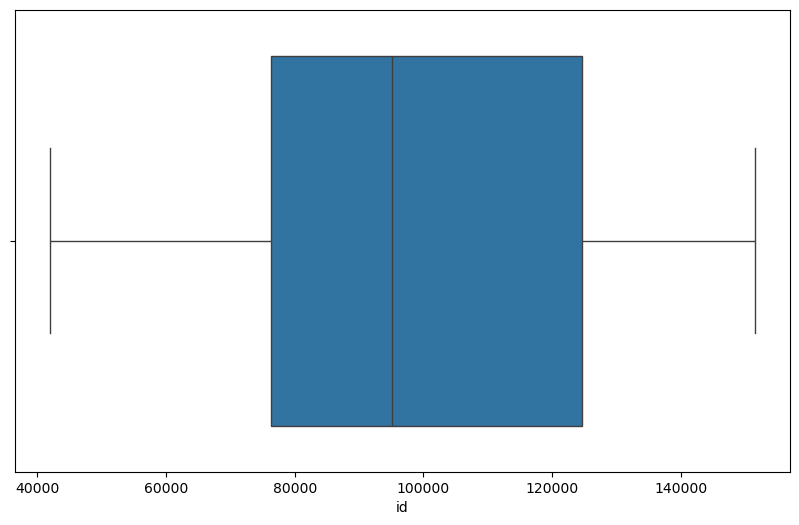

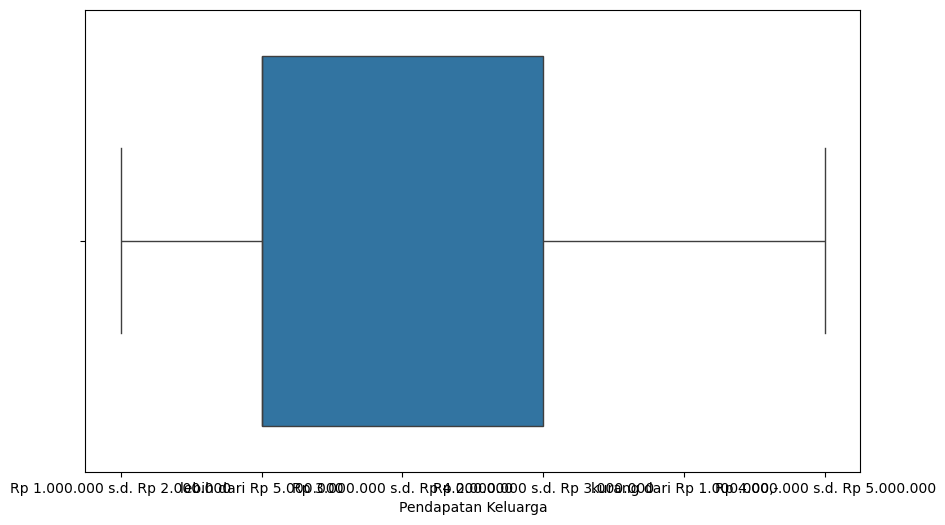

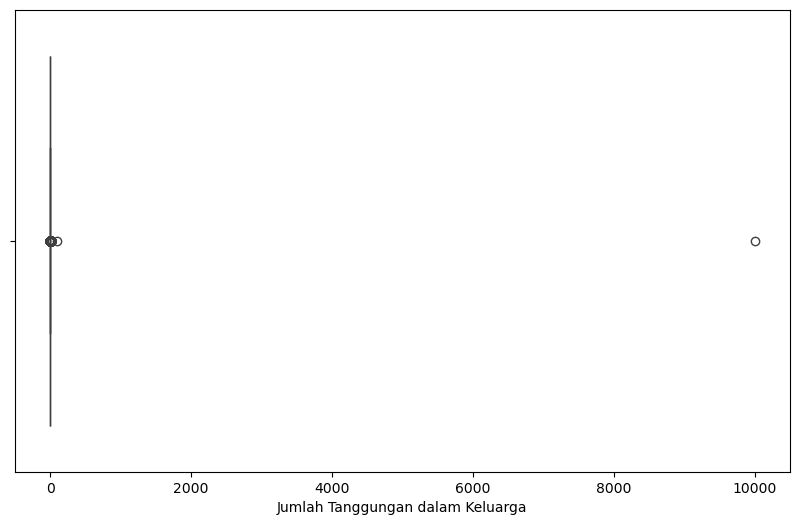

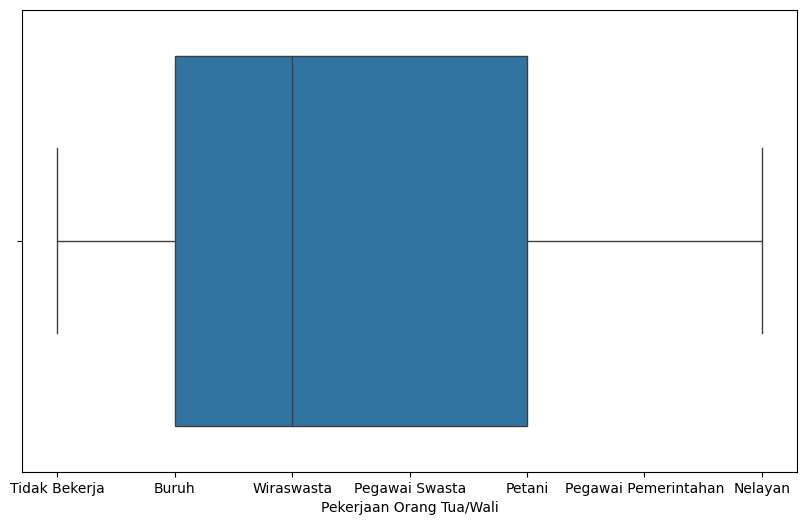

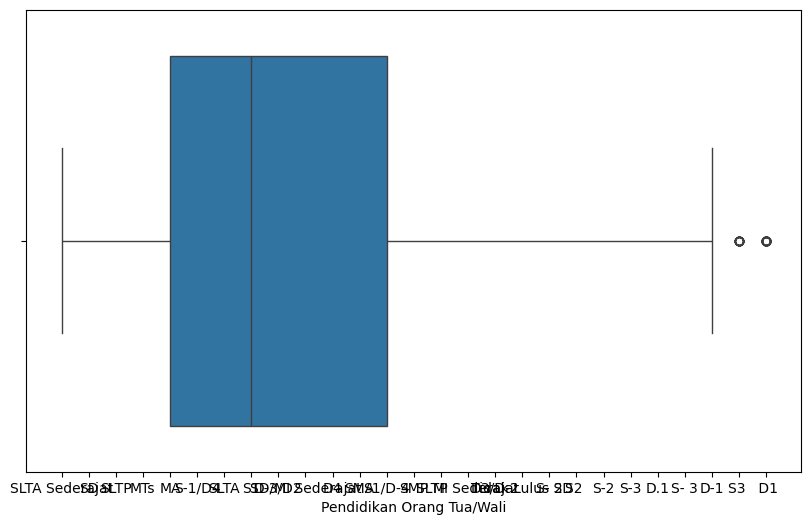

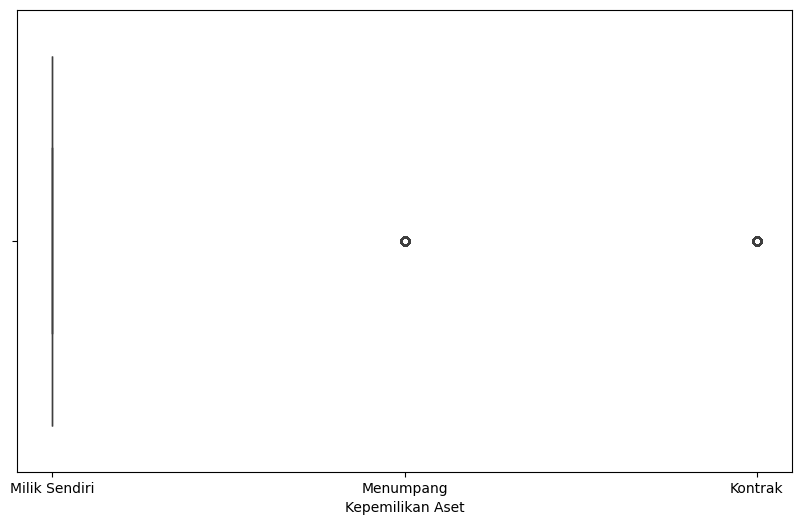

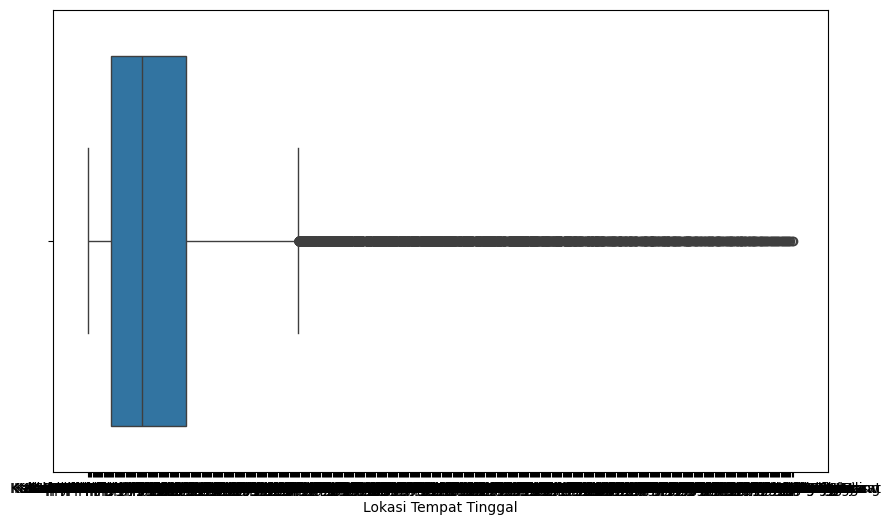

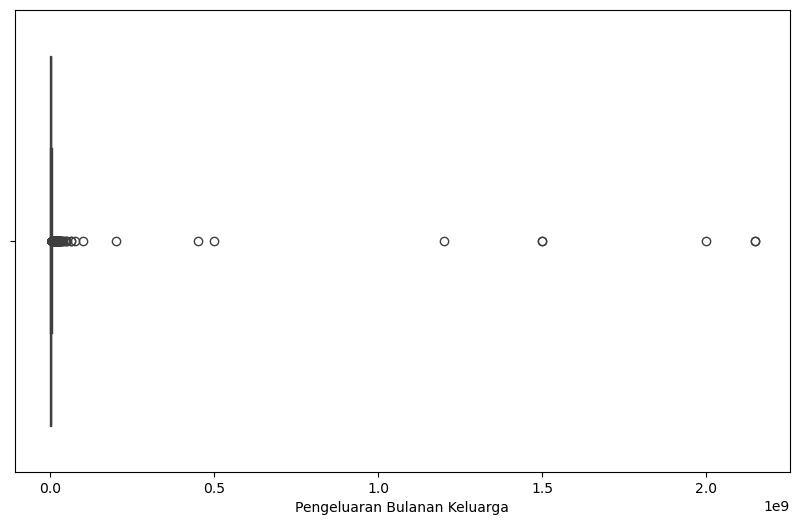

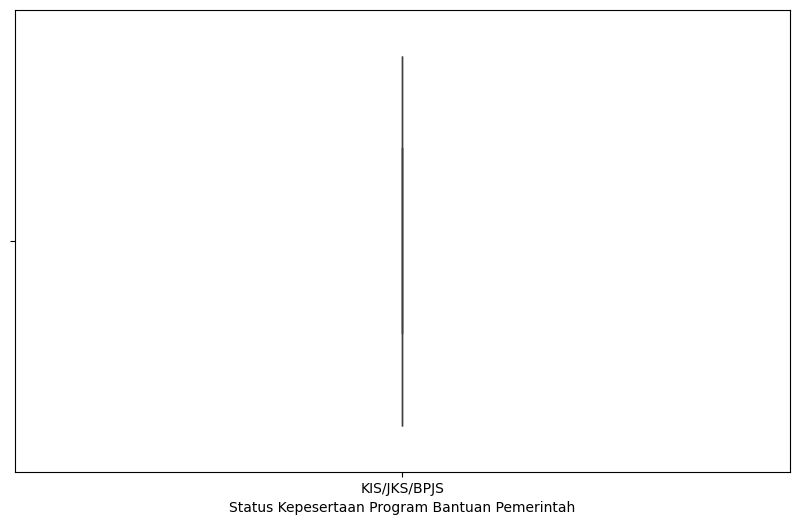

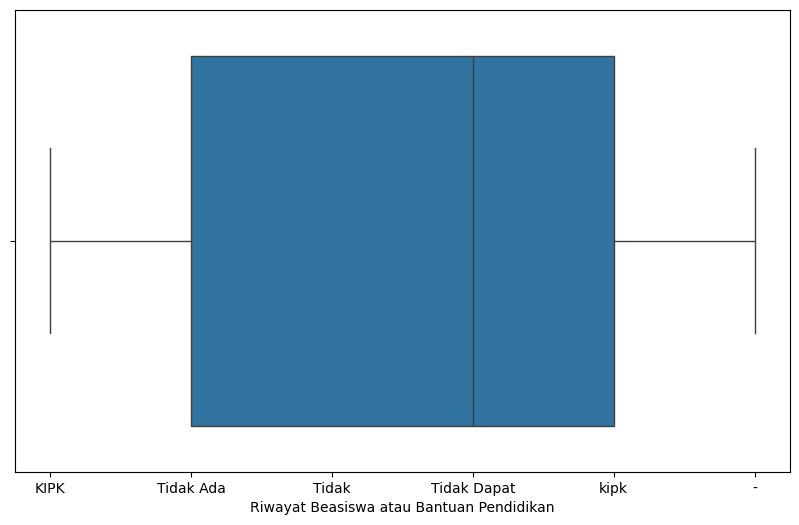

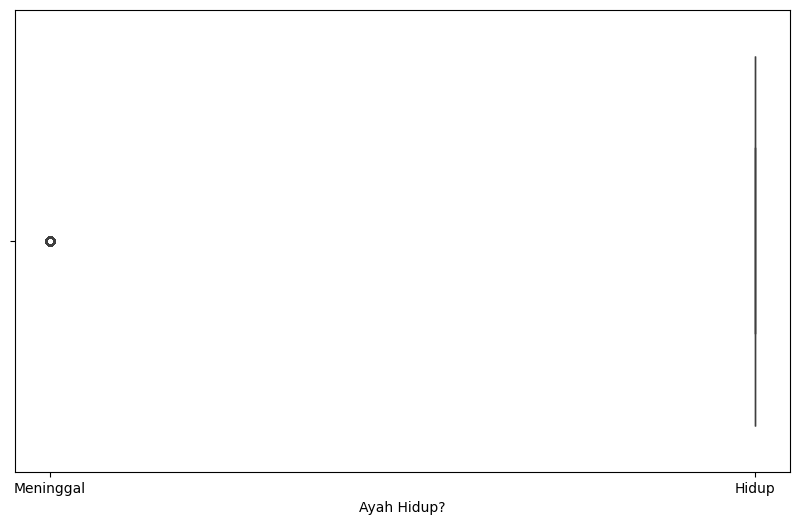

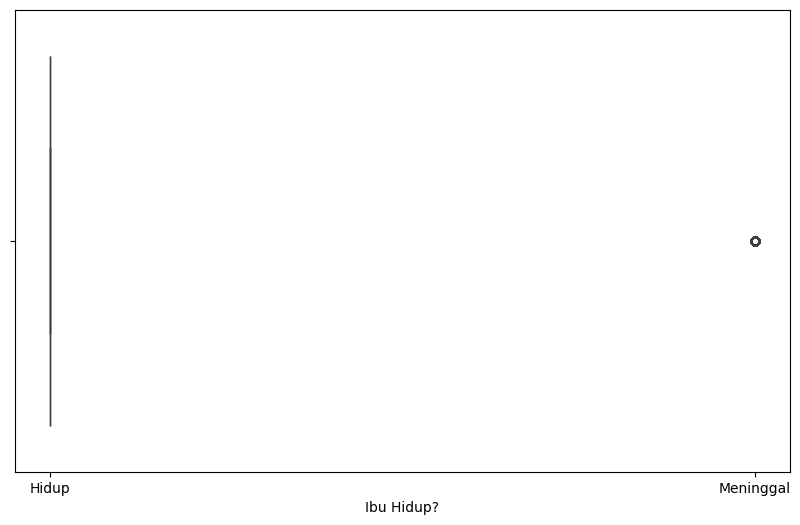

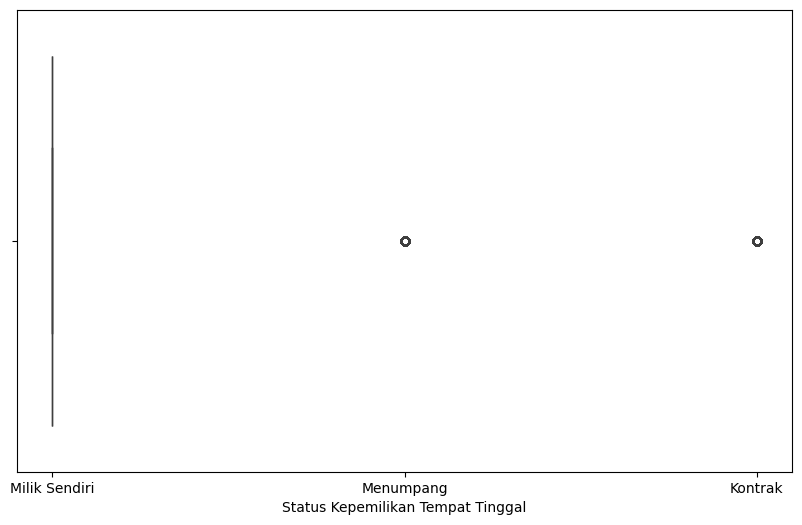

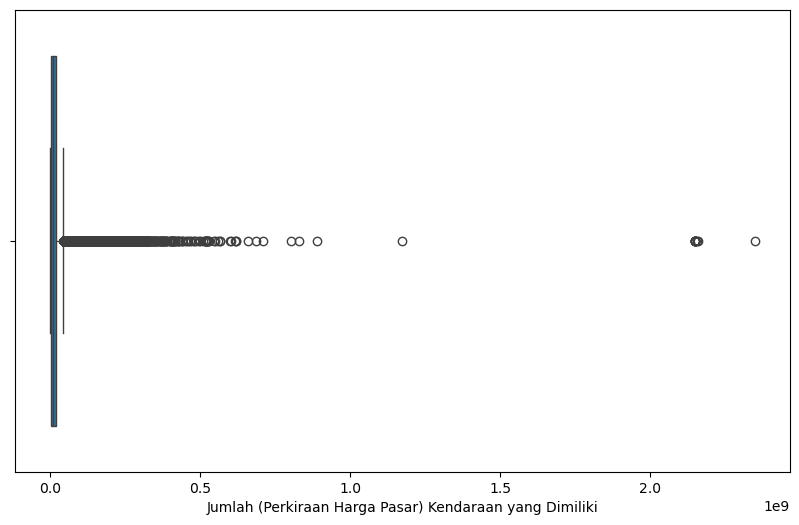

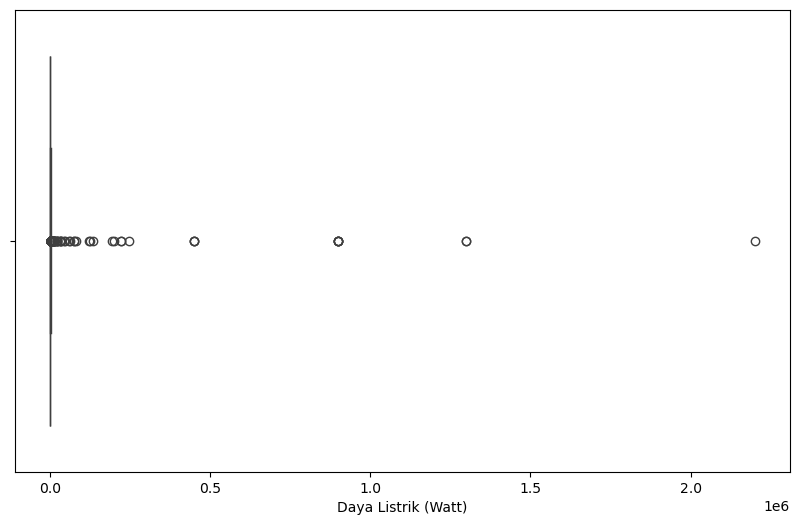

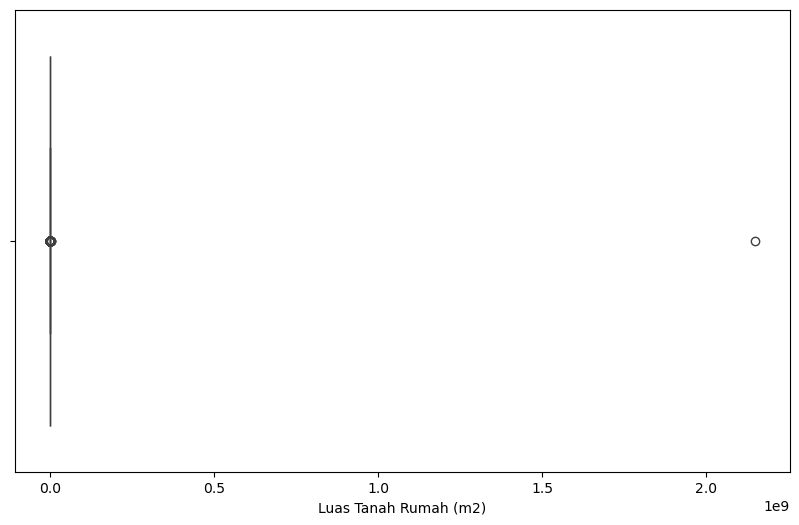

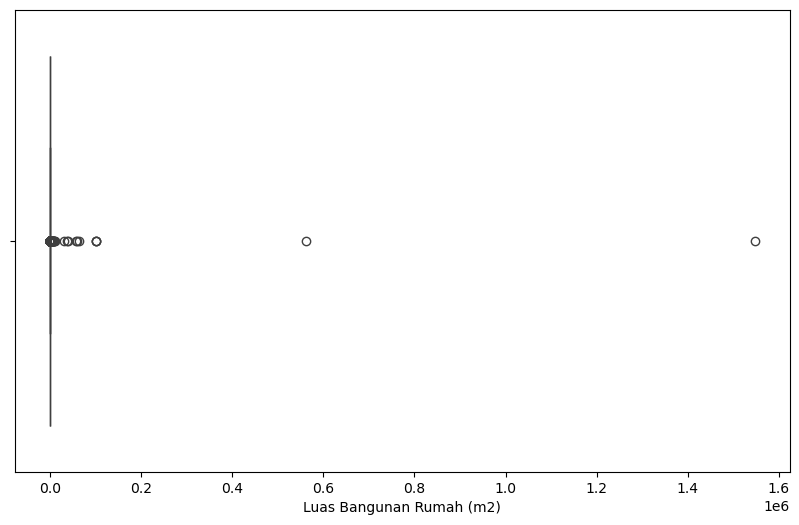

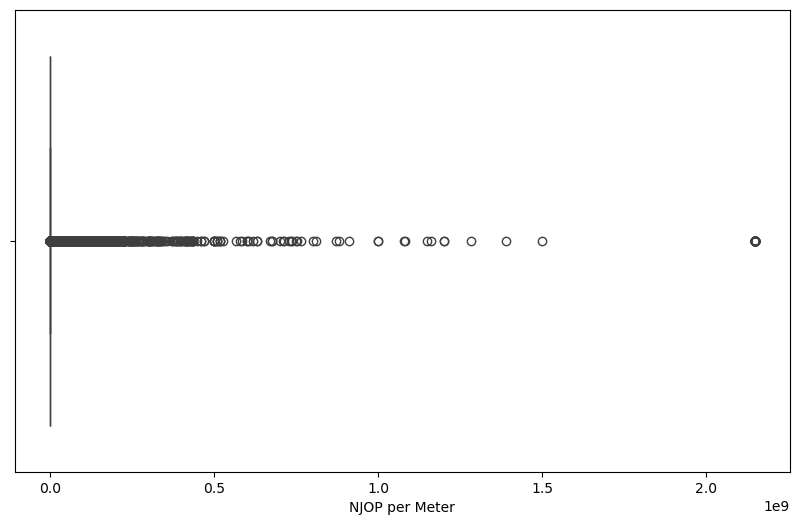

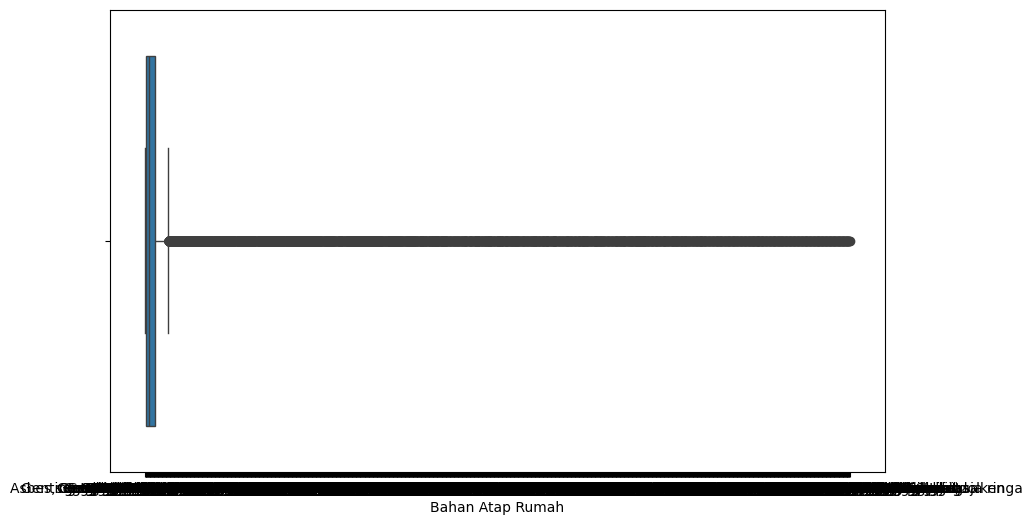

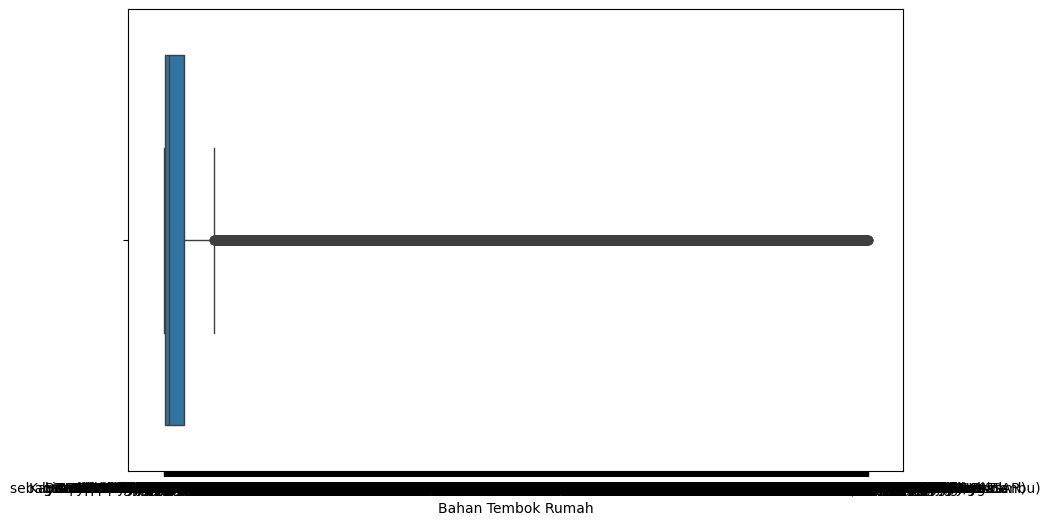

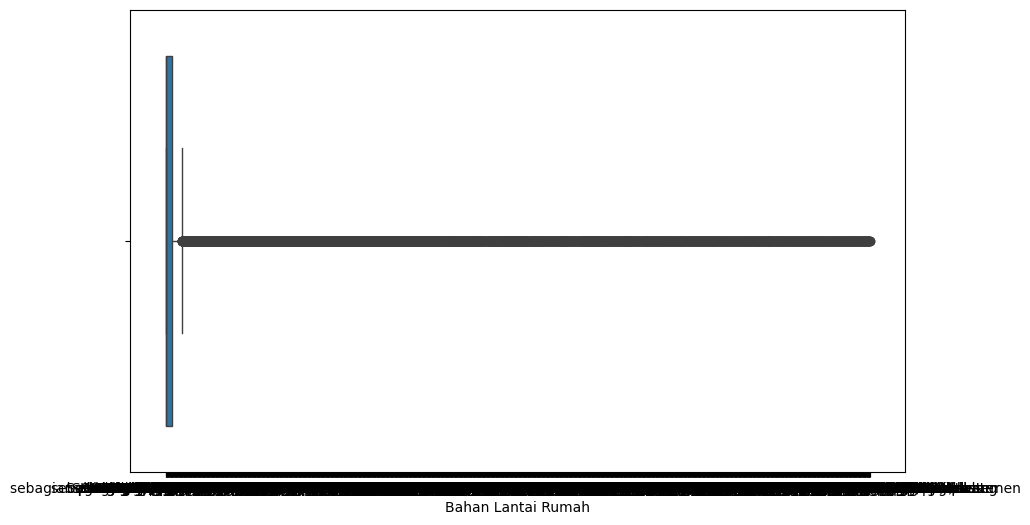

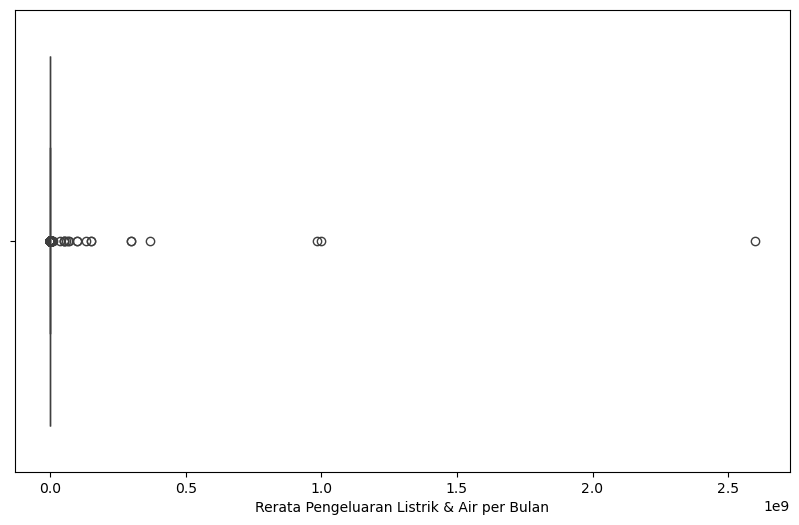

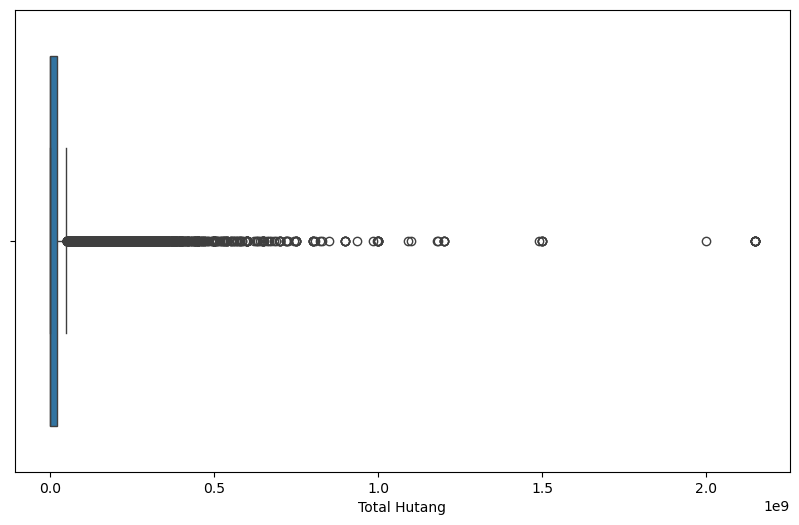

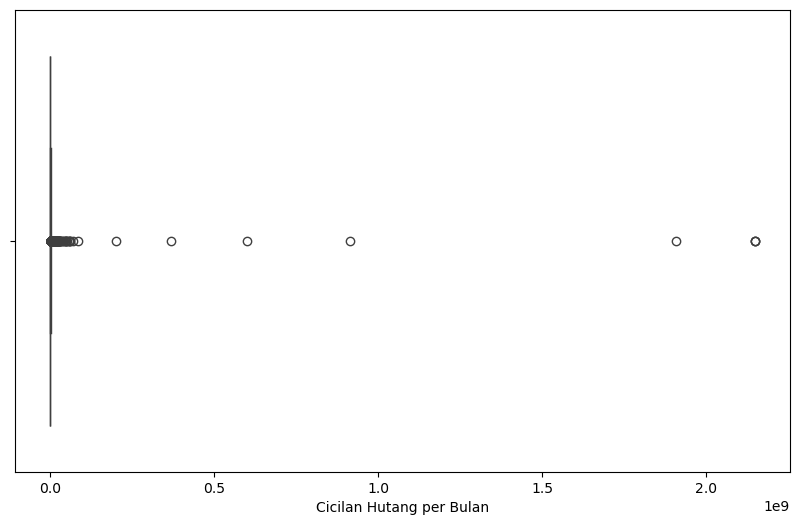

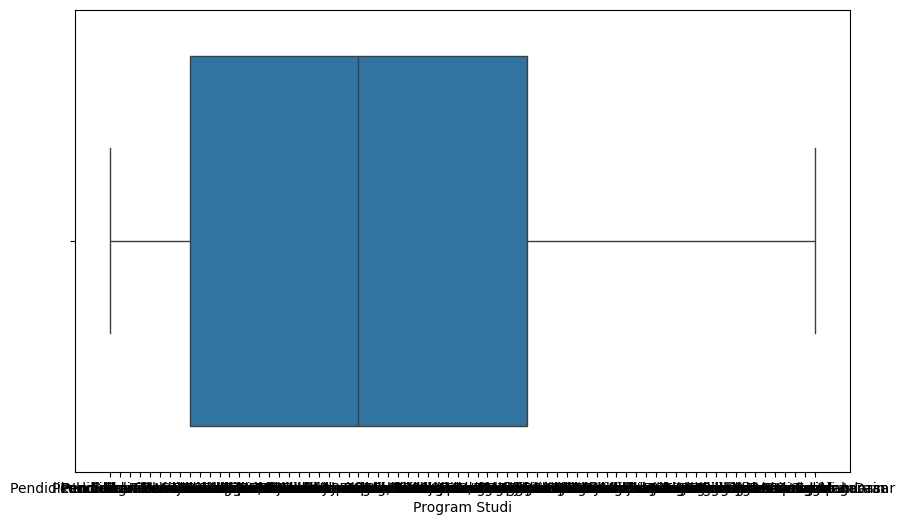

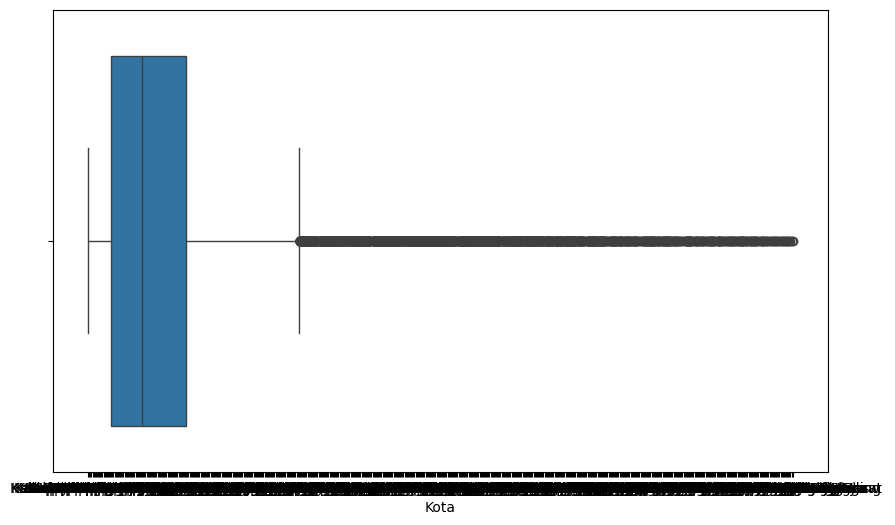

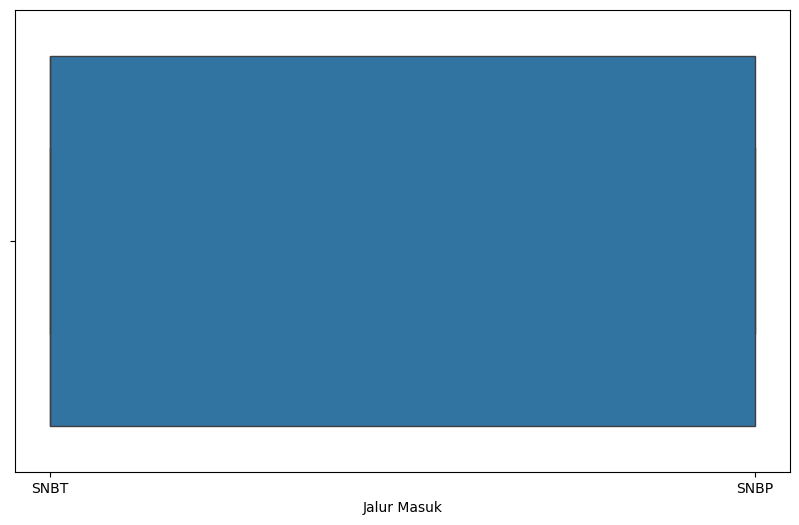

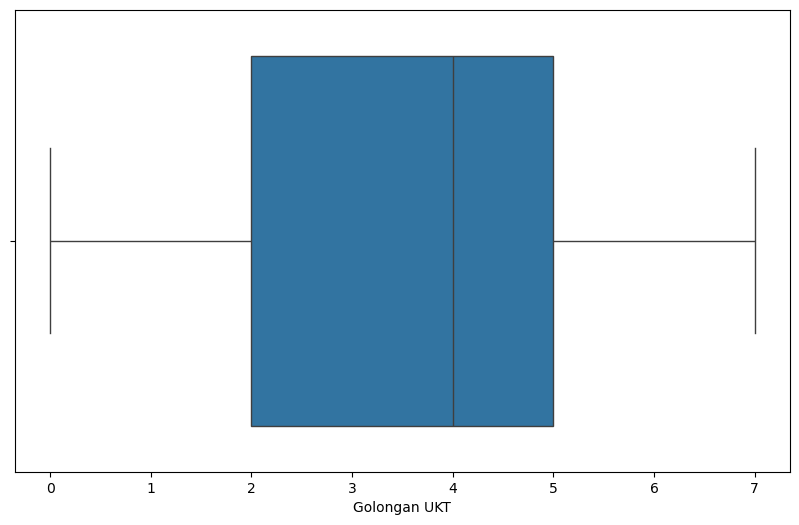

In [15]:
for kol in df:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[kol])
    plt.xlabel(kol)
    plt.show()

In [16]:
df_train = concant

NameError: name 'concant' is not defined

In [ ]:
df['Pendapatan Keluarga'].unique()